***Data Pre-Processing***

In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing Datasets
dataset = pd.read_csv('User_Data.csv')

In [3]:
#Extracting Independent and dependent Variable
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [4]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [5]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)

***Fitting Logistic Regression classifier to the Training data***

In [6]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

***Predicting the test result***

In [7]:
#Predicting the test set result
y_pred= classifier.predict(X_test)

***Test accuracy of the result (Creation of Confusion matrix)***

In [8]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[65  3]
 [ 8 24]]


***Visualizing the training set result***

<ipython-input-9-d48af1d24970>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


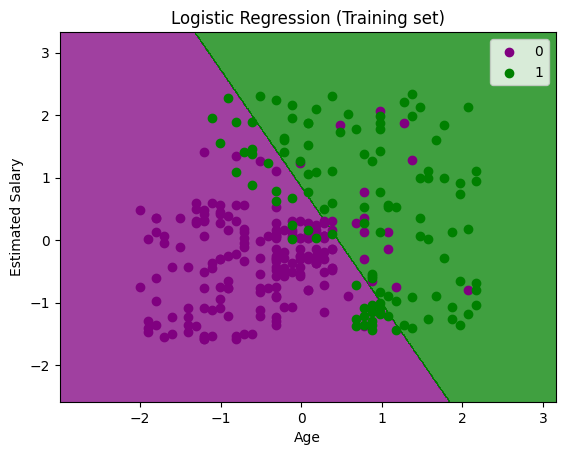

In [9]:
#Visulaizing the trianing set result
from matplotlib.colors import ListedColormap
X_set, y_set = X_train,y_train
x1, x2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step  =0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75,cmap = ListedColormap(('purple','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
  c = ListedColormap(('purple', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()